In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score ,StratifiedKFold,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [ ]:
dataset = pd.read_csv('/content/AcousticFeatures.csv')


**Split**

In [ ]:
X = dataset[['_RMSenergy_Mean', '_Lowenergy_Mean', '_Fluctuation_Mean',
       '_Tempo_Mean', '_MFCC_Mean_1', '_MFCC_Mean_2', '_MFCC_Mean_3',
       '_MFCC_Mean_4', '_MFCC_Mean_5', '_MFCC_Mean_6', '_MFCC_Mean_7',
       '_MFCC_Mean_8', '_MFCC_Mean_9', '_MFCC_Mean_10', '_MFCC_Mean_11',
       '_MFCC_Mean_12', '_MFCC_Mean_13', '_Roughness_Mean', '_Roughness_Slope',
       '_Zero-crossingrate_Mean', '_AttackTime_Mean', '_AttackTime_Slope',
       '_Rolloff_Mean', '_Eventdensity_Mean', '_Pulseclarity_Mean',
       '_Brightness_Mean', '_Spectralcentroid_Mean', '_Spectralspread_Mean',
       '_Spectralskewness_Mean', '_Spectralkurtosis_Mean',
       '_Spectralflatness_Mean', '_EntropyofSpectrum_Mean',
       '_Chromagram_Mean_1', '_Chromagram_Mean_2', '_Chromagram_Mean_3',
       '_Chromagram_Mean_4', '_Chromagram_Mean_5', '_Chromagram_Mean_6',
       '_Chromagram_Mean_7', '_Chromagram_Mean_8', '_Chromagram_Mean_9',
       '_Chromagram_Mean_10', '_Chromagram_Mean_11', '_Chromagram_Mean_12',
       '_HarmonicChangeDetectionFunction_Mean',
       '_HarmonicChangeDetectionFunction_Std',
       '_HarmonicChangeDetectionFunction_Slope',
       '_HarmonicChangeDetectionFunction_PeriodFreq',
       '_HarmonicChangeDetectionFunction_PeriodAmp',
       '_HarmonicChangeDetectionFunction_PeriodEntropy']]
y = dataset['Class']


In [ ]:
dataset.isna().sum()

Class                                             0
_RMSenergy_Mean                                   0
_Lowenergy_Mean                                   0
_Fluctuation_Mean                                 0
_Tempo_Mean                                       0
_MFCC_Mean_1                                      0
_MFCC_Mean_2                                      0
_MFCC_Mean_3                                      0
_MFCC_Mean_4                                      0
_MFCC_Mean_5                                      0
_MFCC_Mean_6                                      0
_MFCC_Mean_7                                      0
_MFCC_Mean_8                                      0
_MFCC_Mean_9                                      0
_MFCC_Mean_10                                     0
_MFCC_Mean_11                                     0
_MFCC_Mean_12                                     0
_MFCC_Mean_13                                     0
_Roughness_Mean                                   0
_Roughness_S

no missing values.

In [ ]:
song_types = dataset["Class"].value_counts()
song_types_df = pd.DataFrame(song_types)
song_types_df = song_types.reset_index(level = 0)
song_types_df

,index,Class
0,relax,100
1,happy,100
2,sad,100
3,angry,100


In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
_RMSenergy_Mean,400.0,0.134650,0.064368,0.010,0.08500,0.1280,0.17400,0.431
_Lowenergy_Mean,400.0,0.553605,0.050750,0.302,0.52300,0.5530,0.58325,0.703
_Fluctuation_Mean,400.0,7.145932,2.280145,3.580,5.85950,6.7340,7.82350,23.475
_Tempo_Mean,400.0,123.682020,34.234344,48.284,101.49025,120.1325,148.98625,195.026
_MFCC_Mean_1,400.0,2.456422,0.799262,0.323,1.94850,2.3895,2.86025,5.996
_MFCC_Mean_2,400.0,0.071890,0.537865,-3.484,-0.26275,0.0685,0.41325,1.937
_MFCC_Mean_3,400.0,0.488065,0.294607,-0.870,0.28125,0.4645,0.68600,1.622
_MFCC_Mean_4,400.0,0.030465,0.275839,-1.636,-0.11700,0.0445,0.19825,1.126
_MFCC_Mean_5,400.0,0.178897,0.195230,-0.494,0.06125,0.1810,0.28850,1.055
_MFCC_Mean_6,400.0,0.038307,0.203754,-0.916,-0.07825,0.0495,0.15125,0.799


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 20)

In [ ]:
# Creating model pipeline
pipe = Pipeline([,
                 ("Classifie("scaler", preprocessing.StandardScaler())r", SVC(random_state = 20))])
# Searching parameters
params = [{"Classifier__kernel": ["rbf"],
           "Classifier__gamma": [1, 0.1, 0.01, 0.001],
           "Classifier__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
         ]

# grid Search CV
grid_search = GridSearchCV(pipe,
                            params,
                            cv = StratifiedKFold(n_splits = 10,
                                                  shuffle = True,
                                                  random_state = 20),
                            refit = True,
                            verbose = 2,
                            scoring = "accuracy")

start_time_train = time.time()
grid_search.fit(X_train, y_train)
end_time_train = time.time()

# get the best model
best_model = grid_search.best_estimator_

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.0s
[CV] END Classifier__C=0.001, Classifier__gamma=1, Classifier__kernel=rbf; total time=   0.

In [ ]:
# Best parameters
best = pd.DataFrame.from_dict(grid_search.best_params_, orient = "index").rename(columns = {0: "Best"})
best

,Best
Classifier__C,1
Classifier__gamma,0.01
Classifier__kernel,rbf


In [ ]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Doğruluk: {accuracy}")
print("Sınıflandırma Raporu:\n", report)
print(f"eğitim süresi: {(end_time_train - start_time_train) / 60}")

Doğruluk: 0.2625
Sınıflandırma Raporu:
               precision    recall  f1-score   support

       angry       1.00      0.08      0.15        25
       happy       0.23      1.00      0.38        18
       relax       0.00      0.00      0.00        17
         sad       1.00      0.05      0.10        20

    accuracy                           0.26        80
   macro avg       0.56      0.28      0.16        80
weighted avg       0.62      0.26      0.16        80

eğitim süresi: 0.09208800395329793


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVC Confusion Matrix


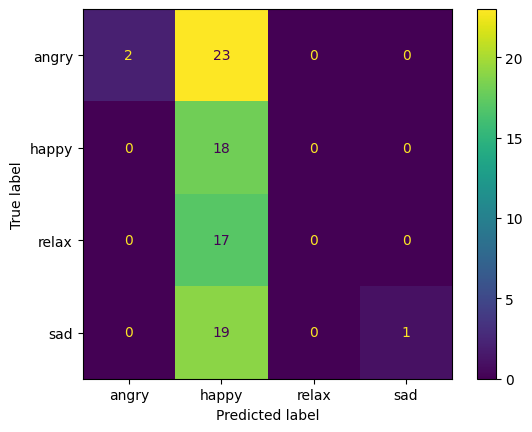

In [ ]:
# Confusion matrix
svc_cm = confusion_matrix(y_test, y_pred, labels = best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = svc_cm,
                              display_labels = best_model.classes_)
print("SVC Confusion Matrix")
disp.plot()
plt.show();